In [8]:
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle

In [9]:
from sklearn.linear_model import Lasso

In [10]:
model_name = "lasso"
display_name = "Lasso"

In [11]:
y_test = pd.read_csv('y_test.csv')
file = open("Selection Methods","rb")
sel_methods = np.load(file)

In [12]:
def get_best_model(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for',display_name,'with',method_string,'dataset')
    x_train = pd.read_csv('x_train' + method + sample_string + '.csv').values
    x_test = pd.read_csv('x_test' + method + '.csv').values
    pipe = Pipeline([('clf', Lasso())])
    grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for',display_name,'with',method_string,"dataset:",grid.best_score_)
    best_args = grid.best_estimator_.get_params()
    print('\nBest hyperparameters for',display_name,'with',method_string,'dataset:')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for',display_name,'using',method_string,':')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return grid.best_estimator_,grid.best_score_,mse,mae,r2

In [13]:
def save_model(model,method):
    with open('CrimeGUI/Models/'+model_name+method,'wb') as file:
        pickle.dump(model,file)

In [14]:
print(sel_methods)

['_f_regression' '_chi2' '_adaboost' '_equal_crime_and_business'
 '_all_business']


<h3>F-Regression feature selected dataset<h3>

In [17]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0,2,0.1)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__random_state':([7]),
        'clf__tol':(arange(0,2,0.1))}

In [18]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Lasso with _f_regression dataset
Fitting 10 folds for each of 12800 candidates, totalling 128000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 497 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done 1560 tasks      | elapsed:   27.7s
[Parallel(n_jobs=6)]: Done 3064 tasks      | elapsed:   47.5s
[Parallel(n_jobs=6)]: Done 5030 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 7452 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 10108 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 13424 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 18210 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 23414 tasks      | elapsed:  4.8min
[Parallel(n_jobs=6)]: Done 29092 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 34101 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 39610 tasks      | elapsed:  8.3min
[Parallel(n_jobs=6)]: Done 45266 tasks      | elapsed:  9.7min
[Parallel(n_jobs=6)]: Done 51782 tasks      | elaps


Best score for Lasso with _f_regression dataset: 0.7439901710700152

Best hyperparameters for Lasso with _f_regression dataset:
memory : None
steps : [('clf', Lasso(alpha=0.0, normalize=True, positive=True, random_state=7, tol=0.0))]
verbose : False
clf : Lasso(alpha=0.0, normalize=True, positive=True, random_state=7, tol=0.0)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : 1000
clf__normalize : True
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.0
clf__warm_start : False

Prediction scores for Lasso using _f_regression :
Mean Squared error: 4.8428290529327205
Mean Absolute error: 1.3789992709632761
R^2: 0.7515509865091387


c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109628.69280115896, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


In [15]:
#smaller alpha and tol range explored
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0,0.5,0.05)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__random_state':([7]),
        'clf__tol':(arange(0,0.5,0.05))}

In [16]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Lasso with _f_regression dataset
Fitting 10 folds for each of 3200 candidates, totalling 32000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 472 tasks      | elapsed:   21.3s
[Parallel(n_jobs=6)]: Done 1105 tasks      | elapsed:   47.1s
[Parallel(n_jobs=6)]: Done 1940 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 2962 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 4740 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 7221 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 9704 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 12966 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 16634 tasks      | elapsed:  6.6min
[Parallel(n_jobs=6)]: Done 21466 tasks      | elapsed:  8.0min
[Parallel(n_jobs=6)]: Done 25086 tasks      | elapsed:  9.2min
[Parallel(n_jobs=6)]: Done 29144 tasks      | elapsed: 10.8min
[Parallel(n_jobs=6)]: Done 32000 out of 32000 | elapsed: 11.9min finished
c:\users\chris\appdata\local\programs\pyth


Best score for Lasso with _f_regression dataset: 0.7439901710700152

Best hyperparameters for Lasso with _f_regression dataset:
memory : None
steps : [('clf', Lasso(alpha=0.0, normalize=True, positive=True, random_state=7, tol=0.0))]
verbose : False
clf : Lasso(alpha=0.0, normalize=True, positive=True, random_state=7, tol=0.0)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : 1000
clf__normalize : True
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.0
clf__warm_start : False

Prediction scores for Lasso using _f_regression :
Mean Squared error: 4.8428290529327205
Mean Absolute error: 1.3789992709632761
R^2: 0.7515509865091387


c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109628.69280115896, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


In [17]:
# parameters stable, model saved
save_model(f_reg_model,sel_methods[0])

<h3>Chi-Squared feature selected dataset<h3>

In [19]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0,2,0.1)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__random_state':([7]),
        'clf__tol':(arange(0,2,0.1))}

In [20]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Lasso with _chi2 dataset
Fitting 10 folds for each of 12800 candidates, totalling 128000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  44 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 556 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 1326 tasks      | elapsed:   23.4s
[Parallel(n_jobs=6)]: Done 2963 tasks      | elapsed:   52.8s
[Parallel(n_jobs=6)]: Done 4631 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 6847 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 9386 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 13138 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 17970 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 22972 tasks      | elapsed:  4.7min
[Parallel(n_jobs=6)]: Done 28294 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 35232 tasks      | elapsed:  6.6min
[Parallel(n_jobs=6)]: Done 42686 tasks      | elapsed:  8.0min
[Parallel(n_jobs=6)]: Done 49466 tasks      | elapsed:  9.4min
[Parallel(n_jobs=6)]: Done 55644 tasks      | elapse


Best score for Lasso with _chi2 dataset: 0.7277697244837357

Best hyperparameters for Lasso with _chi2 dataset:
memory : None
steps : [('clf', Lasso(alpha=0.0, positive=True, random_state=7, selection='random', tol=0.1))]
verbose : False
clf : Lasso(alpha=0.0, positive=True, random_state=7, selection='random', tol=0.1)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : 1000
clf__normalize : False
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.1
clf__warm_start : False

Prediction scores for Lasso using _chi2 :
Mean Squared error: 5.254872539600692
Mean Absolute error: 1.4527229130594046
R^2: 0.7304121445927596


In [18]:
#alpha and tol range fine tuned
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0,0.5,0.05)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__random_state':([7]),
        'clf__tol':(arange(0.05,0.15,0.05))}

In [19]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.




Running cross fold validation for Lasso with _chi2 dataset
Fitting 10 folds for each of 640 candidates, totalling 6400 fits


[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    7.4s
[Parallel(n_jobs=6)]: Done 254 tasks      | elapsed:   31.1s
[Parallel(n_jobs=6)]: Done 522 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 1466 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 4690 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 6400 out of 6400 | elapsed:  1.8min finished
c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py:335: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(



Best score for Lasso with _chi2 dataset: 0.7277697244837357

Best hyperparameters for Lasso with _chi2 dataset:
memory : None
steps : [('clf', Lasso(alpha=0.0, positive=True, random_state=7, selection='random', tol=0.05))]
verbose : False
clf : Lasso(alpha=0.0, positive=True, random_state=7, selection='random', tol=0.05)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : 1000
clf__normalize : False
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.05
clf__warm_start : False

Prediction scores for Lasso using _chi2 :
Mean Squared error: 5.254872539600692
Mean Absolute error: 1.4527229130594046
R^2: 0.7304121445927596


In [20]:
# tol changed but scores identical, model saved
save_model(chi2_model,sel_methods[1])

<h3>AdaBoost feature selected dataset<h3>

In [21]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0,2,0.1)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__random_state':([7]),
        'clf__tol':(arange(0,2,0.1))}

In [22]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Lasso with _adaboost dataset
Fitting 10 folds for each of 12800 candidates, totalling 128000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 730 tasks      | elapsed:   14.0s
[Parallel(n_jobs=6)]: Done 1554 tasks      | elapsed:   28.5s
[Parallel(n_jobs=6)]: Done 2834 tasks      | elapsed:   44.2s
[Parallel(n_jobs=6)]: Done 4511 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 6816 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 9470 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 12470 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 17058 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 21982 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 27520 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 35022 tasks      | elapsed:  6.2min
[Parallel(n_jobs=6)]: Done 42328 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 49300 tasks      | elapsed:  8.8min
[Parallel(n_jobs=6)]: Done 55604 tasks      | elapse


Best score for Lasso with _adaboost dataset: 0.7411286342077107

Best hyperparameters for Lasso with _adaboost dataset:
memory : None
steps : [('clf', Lasso(alpha=0.0, normalize=True, positive=True, random_state=7, tol=0.0))]
verbose : False
clf : Lasso(alpha=0.0, normalize=True, positive=True, random_state=7, tol=0.0)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : 1000
clf__normalize : True
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.0
clf__warm_start : False

Prediction scores for Lasso using _adaboost :
Mean Squared error: 4.964940484500637
Mean Absolute error: 1.3904605888362902
R^2: 0.7452863704391922


c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110829.66175698182, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


In [21]:
#smaller alpha and tol range explored
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0,0.5,0.05)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__random_state':([7]),
        'clf__tol':(arange(0,0.5,0.05))}

In [22]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Lasso with _adaboost dataset
Fitting 10 folds for each of 3200 candidates, totalling 32000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 362 tasks      | elapsed:   16.5s
[Parallel(n_jobs=6)]: Done 876 tasks      | elapsed:   36.4s
[Parallel(n_jobs=6)]: Done 1948 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 2980 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 4566 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 6838 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 9845 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 13236 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 17426 tasks      | elapsed:  6.2min
[Parallel(n_jobs=6)]: Done 22029 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 27336 tasks      | elapsed:  8.7min
[Parallel(n_jobs=6)]: Done 31826 tasks      | elapsed: 10.1min
[Parallel(n_jobs=6)]: Done 32000 out of 32000 | elapsed: 10.1min finished
c:\users\chris\appdata\local\programs\pytho


Best score for Lasso with _adaboost dataset: 0.7411612980848017

Best hyperparameters for Lasso with _adaboost dataset:
memory : None
steps : [('clf', Lasso(alpha=0.0, positive=True, random_state=7, tol=0.05))]
verbose : False
clf : Lasso(alpha=0.0, positive=True, random_state=7, tol=0.05)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : 1000
clf__normalize : False
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.05
clf__warm_start : False

Prediction scores for Lasso using _adaboost :
Mean Squared error: 4.965708684857781
Mean Absolute error: 1.3902107858304404
R^2: 0.7452469598759017


In [23]:
#highest tol selected, explored further
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0,0.5,0.1)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__random_state':([7]),
        'clf__tol':(arange(0,1,0.05))}

In [24]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Lasso with _adaboost dataset
Fitting 10 folds for each of 3200 candidates, totalling 32000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=6)]: Done 641 tasks      | elapsed:   18.5s
[Parallel(n_jobs=6)]: Done 1443 tasks      | elapsed:   40.7s
[Parallel(n_jobs=6)]: Done 2654 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 3740 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 5718 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 7806 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 11012 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 14676 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 18650 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 22986 tasks      | elapsed:  5.8min
[Parallel(n_jobs=6)]: Done 28854 tasks      | elapsed:  6.7min
[Parallel(n_jobs=6)]: Done 32000 out of 32000 | elapsed:  7.2min finished
c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py:335: UserWar


Best score for Lasso with _adaboost dataset: 0.7411612980848017

Best hyperparameters for Lasso with _adaboost dataset:
memory : None
steps : [('clf', Lasso(alpha=0.0, positive=True, random_state=7, tol=0.05))]
verbose : False
clf : Lasso(alpha=0.0, positive=True, random_state=7, tol=0.05)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : 1000
clf__normalize : False
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.05
clf__warm_start : False

Prediction scores for Lasso using _adaboost :
Mean Squared error: 4.965708684857781
Mean Absolute error: 1.3902107858304404
R^2: 0.7452469598759017


In [25]:
# parameters stable, model saved
save_model(ada_model,sel_methods[2])

<h3>Equal business and crime feature selected dataset<h3>

In [23]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0,2,0.1)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__random_state':([7]),
        'clf__tol':(arange(0,2,0.1))}

In [24]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.




Running cross fold validation for Lasso with _equal_crime_and_business dataset
Fitting 10 folds for each of 12800 candidates, totalling 128000 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 724 tasks      | elapsed:   13.1s
[Parallel(n_jobs=6)]: Done 1702 tasks      | elapsed:   29.8s
[Parallel(n_jobs=6)]: Done 3047 tasks      | elapsed:   54.0s
[Parallel(n_jobs=6)]: Done 4786 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 7020 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 9542 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 13942 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 17208 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 21856 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 28792 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 34686 tasks      | elapsed:  6.4min
[Parallel(n_jobs=6)]: Done 40942 tasks      | elapsed:  7.6min
[Parallel(n_jobs=6)]: Done 48208 tasks      | elapsed:  8.9min
[Parallel(n_jobs=6)]: Done 54594 tasks      | elapsed: 10.3min
[Parallel(n_jobs=6)]: Done 61556 tasks      | elapsed: 11.9min
[


Best score for Lasso with _equal_crime_and_business dataset: 0.7284944980291057

Best hyperparameters for Lasso with _equal_crime_and_business dataset:
memory : None
steps : [('clf', Lasso(alpha=0.0, normalize=True, random_state=7, tol=0.0))]
verbose : False
clf : Lasso(alpha=0.0, normalize=True, random_state=7, tol=0.0)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : 1000
clf__normalize : True
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.0
clf__warm_start : False

Prediction scores for Lasso using _equal_crime_and_business :
Mean Squared error: 5.135861372359901
Mean Absolute error: 1.4188595307686909
R^2: 0.7365177094954614


c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116118.26944246335, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


In [26]:
#smaller alpha and tol range explored
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0,0.5,0.05)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__random_state':([7]),
        'clf__tol':(arange(0,0.5,0.05))}

In [27]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Lasso with _equal_crime_and_business dataset
Fitting 10 folds for each of 3200 candidates, totalling 32000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=6)]: Done 460 tasks      | elapsed:   22.3s
[Parallel(n_jobs=6)]: Done 1131 tasks      | elapsed:   56.7s
[Parallel(n_jobs=6)]: Done 1889 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 2952 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 5094 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 7610 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 10049 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done 13644 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 17620 tasks      | elapsed:  6.5min
[Parallel(n_jobs=6)]: Done 21892 tasks      | elapsed:  7.6min
[Parallel(n_jobs=6)]: Done 27132 tasks      | elapsed:  8.9min
[Parallel(n_jobs=6)]: Done 32000 out of 32000 | elapsed: 10.4min finished
c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py:335: UserWar


Best score for Lasso with _equal_crime_and_business dataset: 0.7284944980291057

Best hyperparameters for Lasso with _equal_crime_and_business dataset:
memory : None
steps : [('clf', Lasso(alpha=0.0, normalize=True, random_state=7, tol=0.0))]
verbose : False
clf : Lasso(alpha=0.0, normalize=True, random_state=7, tol=0.0)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : 1000
clf__normalize : True
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.0
clf__warm_start : False

Prediction scores for Lasso using _equal_crime_and_business :
Mean Squared error: 5.135861372359901
Mean Absolute error: 1.4188595307686909
R^2: 0.7365177094954614


c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116118.26944246335, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


In [28]:
# parameters stable, model saved
save_model(equal_model,sel_methods[3])

<h3>Business only feature selected dataset<h3>

In [25]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0,2,0.1)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__random_state':([7]),
        'clf__tol':(arange(0,2,0.1))}

In [26]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Lasso with _all_business dataset
Fitting 10 folds for each of 12800 candidates, totalling 128000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 668 tasks      | elapsed:   16.6s
[Parallel(n_jobs=6)]: Done 1290 tasks      | elapsed:   29.4s
[Parallel(n_jobs=6)]: Done 2530 tasks      | elapsed:   56.6s
[Parallel(n_jobs=6)]: Done 4079 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 6087 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 9454 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 12832 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 16370 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 21596 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 27172 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 33570 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 41230 tasks      | elapsed:  8.4min
[Parallel(n_jobs=6)]: Done 48448 tasks      | elapsed:  9.8min
[Parallel(n_jobs=6)]: Done 54150 tasks      | elapse


Best score for Lasso with _all_business dataset: 0.44996200683603715

Best hyperparameters for Lasso with _all_business dataset:
memory : None
steps : [('clf', Lasso(alpha=0.0, normalize=True, random_state=7, selection='random', tol=0.0))]
verbose : False
clf : Lasso(alpha=0.0, normalize=True, random_state=7, selection='random', tol=0.0)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : 1000
clf__normalize : True
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.0
clf__warm_start : False

Prediction scores for Lasso using _all_business :
Mean Squared error: 10.68578982118223
Mean Absolute error: 1.8508237579583582
R^2: 0.45179276195271134


c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233057.88432637145, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


In [29]:
#smaller alpha and tol range explored
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0,0.5,0.05)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__random_state':([7]),
        'clf__tol':(arange(0,0.5,0.05))}

In [30]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.




Running cross fold validation for Lasso with _all_business dataset
Fitting 10 folds for each of 3200 candidates, totalling 32000 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.9s
[Parallel(n_jobs=6)]: Done 356 tasks      | elapsed:   33.7s
[Parallel(n_jobs=6)]: Done 732 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 1528 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 2448 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 4308 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 7094 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 10046 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 13500 tasks      | elapsed:  6.7min
[Parallel(n_jobs=6)]: Done 17944 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 21886 tasks      | elapsed:  8.9min
[Parallel(n_jobs=6)]: Done 26490 tasks      | elapsed: 10.0min
[Parallel(n_jobs=6)]: Done 31970 tasks      | elapsed: 11.4min
[Parallel(n_jobs=6)]: Done 32000 out of 32000 | elapsed: 11.4min finished
c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py:335: UserWarning: With al


Best score for Lasso with _all_business dataset: 0.44996200683603715

Best hyperparameters for Lasso with _all_business dataset:
memory : None
steps : [('clf', Lasso(alpha=0.0, normalize=True, random_state=7, selection='random', tol=0.0))]
verbose : False
clf : Lasso(alpha=0.0, normalize=True, random_state=7, selection='random', tol=0.0)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : 1000
clf__normalize : True
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.0
clf__warm_start : False

Prediction scores for Lasso using _all_business :
Mean Squared error: 10.68578982118223
Mean Absolute error: 1.8508237579583582
R^2: 0.45179276195271134


c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233057.88432637145, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


In [31]:
# parameters stable, model saved
save_model(bus_model,sel_methods[4])

<h3>Visualise scores<h3>

In [32]:
training_scores = [f_reg_train_score, chi2_train_score, ada_train_score, equal_train_score, bus_train_score]
mse_scores = [f_reg_mse, chi2_mse, ada_mse, equal_mse, bus_mse]
mae_scores = [f_reg_mae, chi2_mae, ada_mae, equal_mae, bus_mae]
r2_scores = [f_reg_r2, chi2_r2, ada_r2, equal_r2, bus_r2]
datasets = ["F-Regression","Chi-Squared","AdaBoost","Equal Business\nand Crime","All Business"]
y_select = np.arange(len(datasets))

<BarContainer object of 5 artists>

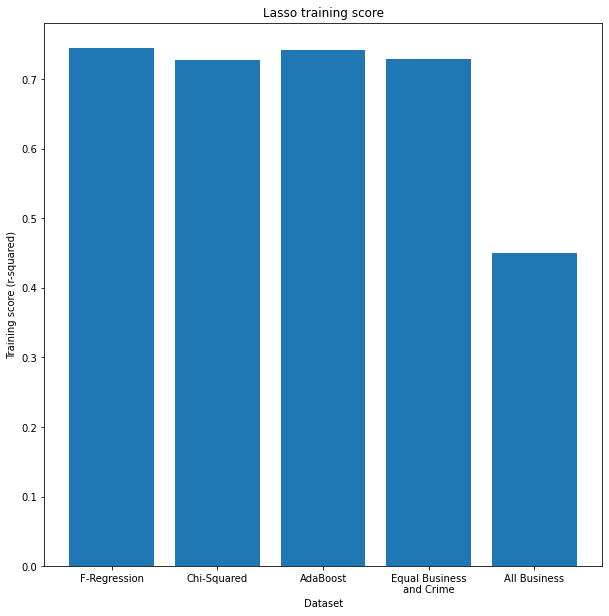

In [37]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " training score")
plt.xlabel("Dataset")
plt.ylabel("Training score (r-squared)")
plt.bar(y_select, training_scores)

<BarContainer object of 5 artists>

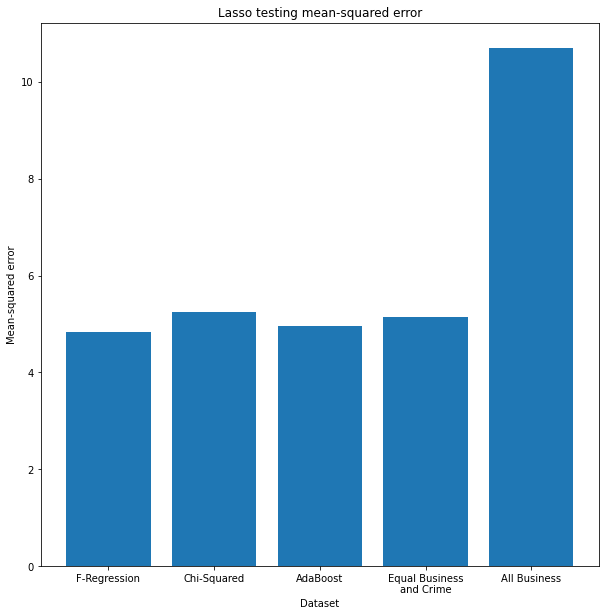

In [38]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing mean-squared error")
plt.xlabel("Dataset")
plt.ylabel("Mean-squared error")
plt.bar(y_select, mse_scores)

<BarContainer object of 5 artists>

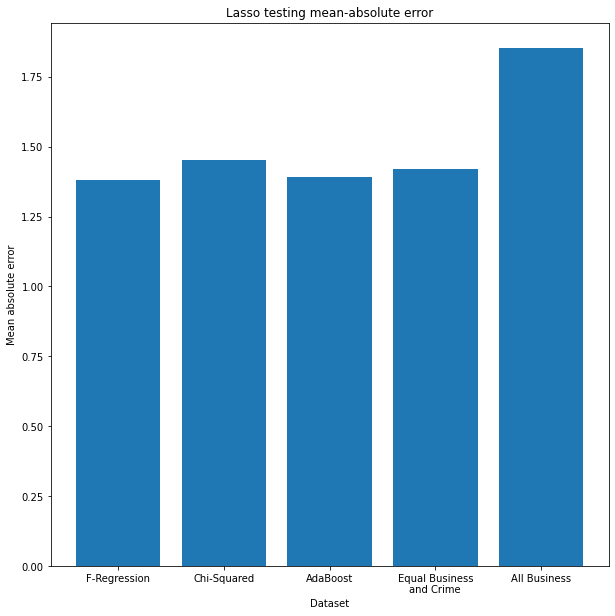

In [39]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing mean-absolute error")
plt.xlabel("Dataset")
plt.ylabel("Mean absolute error")
plt.bar(y_select, mae_scores)

<BarContainer object of 5 artists>

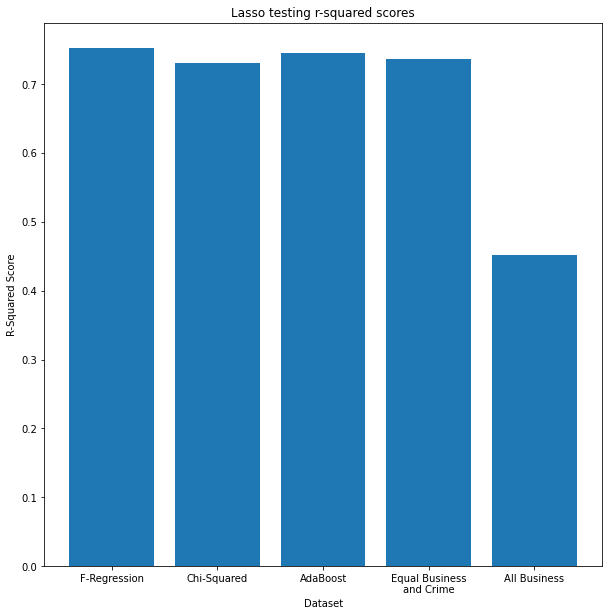

In [40]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing r-squared scores")
plt.xlabel("Dataset")
plt.ylabel("R-Squared Score")
plt.bar(y_select, r2_scores)